In [20]:
import numpy as np
import cv2
import pandas as pd
import os
import importlib
import time
import matplotlib.pyplot as plt
import ntpath

In [52]:
from utils.msop import *
#!

In [4]:
SRCDIR = 'images/parrington/'
METAPATH = os.path.join(SRCDIR, 'pano.txt')

In [46]:
def cylindrical_projection(img, focal_length):
    height, width, _ = img.shape
    cylinder_proj = np.zeros(shape=img.shape, dtype=np.uint8)
    
    for y in range(-int(height/2), int(height/2)):
        for x in range(-int(width/2), int(width/2)):
            cylinder_x = focal_length*math.atan(x/focal_length)
            cylinder_y = focal_length*y/math.sqrt(x**2+focal_length**2)
            
            cylinder_x = round(cylinder_x + width/2)
            cylinder_y = round(cylinder_y + height/2)

            if cylinder_x >= 0 and cylinder_x < width and cylinder_y >= 0 and cylinder_y < height:
                cylinder_proj[cylinder_y][cylinder_x] = img[y+int(height/2)][x+int(width/2)]
    
    # Crop black border
    # ref: http://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv
    _, thresh = cv2.threshold(cv2.cvtColor(cylinder_proj, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
        
    return cylinder_proj[y:y+h, x:x+w]

## Dealing with Meta

In [7]:
with open(METAPATH) as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [26]:
ii = 0
metas = []
func = None
for line in content:
    if ii == 0:
        if func is None:
            func = ntpath.basename if '\\' in line else os.paht.basename
        meta = {'filename':func(line)}
    elif ii== 11:
        meta['f'] = float(line)
    elif ii == 12:
        ii = 0
        metas.append(meta)
        continue
    ii+=1
    

In [27]:
metas

[{'filename': 'prtn00.jpg', 'f': 704.916},
 {'filename': 'prtn01.jpg', 'f': 706.286},
 {'filename': 'prtn02.jpg', 'f': 705.849},
 {'filename': 'prtn03.jpg', 'f': 706.645},
 {'filename': 'prtn04.jpg', 'f': 706.587},
 {'filename': 'prtn05.jpg', 'f': 705.645},
 {'filename': 'prtn06.jpg', 'f': 705.327},
 {'filename': 'prtn07.jpg', 'f': 704.696},
 {'filename': 'prtn08.jpg', 'f': 703.794},
 {'filename': 'prtn09.jpg', 'f': 704.325},
 {'filename': 'prtn10.jpg', 'f': 704.696},
 {'filename': 'prtn11.jpg', 'f': 703.895},
 {'filename': 'prtn12.jpg', 'f': 704.289},
 {'filename': 'prtn13.jpg', 'f': 704.676},
 {'filename': 'prtn14.jpg', 'f': 704.847},
 {'filename': 'prtn15.jpg', 'f': 704.537},
 {'filename': 'prtn16.jpg', 'f': 705.102},
 {'filename': 'prtn17.jpg', 'f': 705.576}]

## Projection

In [50]:
imgs = []
orimgs = []
for m in metas:
    orimg = cv2.imread(os.path.join(SRCDIR, m['filename']))
    prjimg= cylindrical_projection(orimg, m['f'])
    imgs.append(prjimg)
    orimgs.append(orimg)

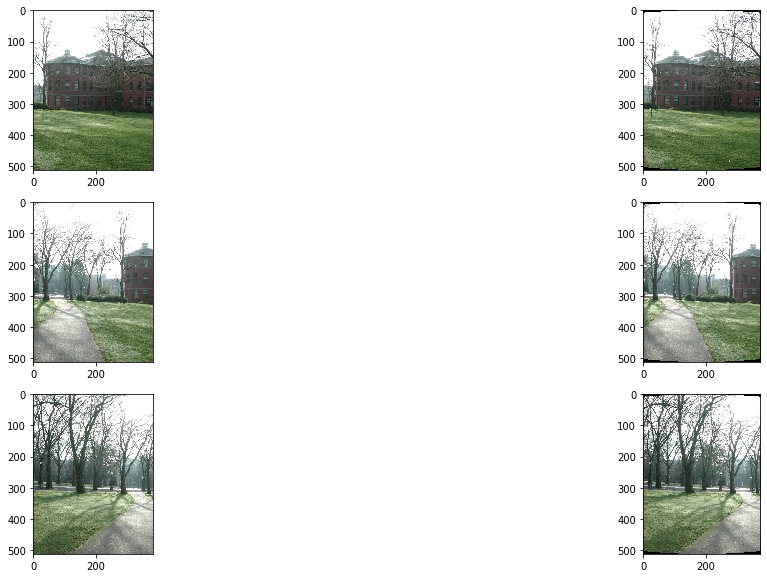

In [51]:
fig=plt.figure(figsize=(20, 10))
columns = 2
rows = len(imgs)
for i in range(1, rows+1):
    orimg = orimgs[i-1]
    prjimg = imgs[i-1]
    fig.subplots_adjust(wspace=0.2)
    fig.add_subplot(rows, columns, i*2-1)
    plt.imshow(cv2.cvtColor(orimg, cv2.COLOR_BGR2RGB)) 
    fig.subplots_adjust(wspace=0.2)
    fig.add_subplot(rows, columns, i*2)
    plt.imshow(cv2.cvtColor(prjimg, cv2.COLOR_BGR2RGB)) 